In [1]:
%matplotlib inline
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- ATLAS style ---
ROOT.gROOT.LoadMacro("/home/kalelc/research/atlasstyle/AtlasStyle.C")
ROOT.gROOT.LoadMacro("/home/kalelc/research/atlasstyle/AtlasUtils.C")
ROOT.gROOT.LoadMacro("/home/kalelc/research/atlasstyle/AtlasLabels.C")
ROOT.SetAtlasStyle()

ROOT.EnableImplicitMT()

# --- Load Delphes ---
delphes_dir = "/home/kalelc/research/Delphes-3.5.0/"
status = ROOT.gSystem.Load(delphes_dir + "libDelphes.so")
if status != 0:
    raise RuntimeError("Error: Could not load libDelphes.so")
print("libDelphes.so loaded successfully!")

# Input ROOT file
fdir = delphes_dir + "displacedPhoton/dark_events.root"
df = ROOT.RDataFrame("Delphes", fdir)

FINAL_STATUS = 62


Applying ATLAS style settings...

libDelphes.so loaded successfully!


In [2]:
# --- Convert truth particles to pandas ---
particle_dict = df.AsNumpy([
    "Event.Number",
    "Particle.PT",
    "Particle.Eta",
    "Particle.Phi",
    "Particle.Mass",
    "Particle.PID",
    "Particle.fUniqueID",
    "Particle.M1",
    "Particle.M2",
    "Particle.D1",
    "Particle.D2",
    "Particle.P",
    "Particle.Status",
    "Particle.Charge",
    "Particle.T"
])

# Flatten event numbers (scalars, not 1-element arrays)
event_numbers = [arr[0] for arr in particle_dict["Event.Number"]]

# Add particle indices per event (needed for mother/daughter lookup)
particle_dict["Particle.Index"] = [
    np.arange(len(pt)) for pt in particle_dict["Particle.PT"]
]

# Build DataFrame
particle_df = pd.DataFrame({
    "EventNumber": event_numbers,
    "ParticleIndex": particle_dict["Particle.Index"],
    "PT": particle_dict["Particle.PT"],
    "Eta": particle_dict["Particle.Eta"],
    "Phi": particle_dict["Particle.Phi"],
    "Mass": particle_dict["Particle.Mass"],
    "PID": particle_dict["Particle.PID"],
    "UniqueID": particle_dict["Particle.fUniqueID"],  # keep for reference
    "M1": particle_dict["Particle.M1"],
    "M2": particle_dict["Particle.M2"],
    "D1": particle_dict["Particle.D1"],
    "D2": particle_dict["Particle.D2"],
    "P": particle_dict["Particle.P"],
    "Status": particle_dict["Particle.Status"],
    "Charge": particle_dict["Particle.Charge"],
    "T": particle_dict["Particle.T"],
})

# Only look at the first 1000 events for now
particle_df = particle_df[particle_df["EventNumber"] < 1000]

# Explode so each particle gets its own row
particle_df = particle_df.explode([
    "ParticleIndex", "PT", "Eta", "Phi", "Mass", "PID", "UniqueID",
    "M1", "M2", "D1", "D2", "P", "Status", "Charge", "T"
], ignore_index=True)

# Convert indices to integer
particle_df[["ParticleIndex", "M1", "M2", "D1", "D2"]] = particle_df[["ParticleIndex", "M1", "M2", "D1", "D2"]].astype(int)

particle_df = particle_df.sort_values(by="EventNumber").reset_index(drop=True)

particle_df

,EventNumber,ParticleIndex,PT,Eta,Phi,Mass,PID,UniqueID,M1,M2,D1,D2,P,Status,Charge,T
0,0,22,0.0,999.900024,1.570796,0.0,21,23,6,-1,39,40,-0.0,41,0,0.0
1,0,21,0.0,999.900024,1.487655,0.0,21,22,5,-1,37,38,-0.0,41,0,0.0
2,0,20,0.0,999.900024,2.123031,0.0,21,21,4,-1,36,36,-0.0,42,0,0.0
3,0,99,0.755993,1.604615,-2.008044,0.0,21,98,88,-1,100,100,-0.0,44,0,0.0
4,0,98,2.076398,1.734484,-2.695525,0.0,21,97,97,-1,181,209,-0.0,71,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423775,999,682,138.880997,1.339273,-0.801005,100.0,54,683,657,-1,687,687,-0.0,44,0,0.0
1423776,999,681,137.087189,0.747935,2.312133,100.0,54,682,656,-1,686,686,-0.0,44,0,0.0
1423777,999,680,0.184979,-1.912525,1.607437,0.0,22,681,655,-1,-1,-1,-0.0,1,0,0.0
1423778,999,679,0.164937,-1.896553,0.8142,0.0,22,680,655,-1,-1,-1,-0.0,1,0,0.0


In [3]:
phi_df = particle_df[particle_df["PID"] == 54]  # Phi only
phi_df

,EventNumber,ParticleIndex,PT,Eta,Phi,Mass,PID,UniqueID,M1,M2,D1,D2,P,Status,Charge,T
290,0,426,22.555918,0.162928,-1.689646,100.0,54,426,53,424,561,561,-0.0,23,0,0.0
291,0,425,22.555918,3.813995,1.451946,100.0,54,425,53,424,560,560,-0.0,23,0,0.0
475,0,561,35.90744,0.170741,-1.561672,100.0,54,562,426,-1,652,652,-0.0,44,0,0.0
476,0,560,21.216751,3.855356,1.429706,100.0,54,561,425,-1,651,651,-0.0,44,0,0.0
512,0,652,40.713619,0.187187,-1.546577,100.0,54,653,561,-1,760,760,-0.0,44,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423726,999,657,139.420929,1.333534,-0.74671,100.0,54,658,611,-1,682,682,-0.0,44,0,0.0
1423753,999,686,134.088394,0.735325,2.329603,100.0,54,687,681,-1,694,694,-0.0,44,0,0.0
1423754,999,687,140.621399,1.343393,-0.811142,100.0,54,688,682,-1,695,695,-0.0,44,0,0.0
1423775,999,682,138.880997,1.339273,-0.801005,100.0,54,683,657,-1,687,687,-0.0,44,0,0.0


<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:19: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:19: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_166319/1342724950.py:18: SyntaxWarning: invalid escape sequence '\e'
  ax2.set_title("Phi $\eta$")
/tmp/ipykernel_166319/1342724950.py:19: SyntaxWarning: invalid escape sequence '\e'
  ax2.set_xlabel("$\eta$")
/tmp/ipykernel_166319/1342724950.py:22: SyntaxWarning: invalid escape sequence '\e'
  ax2.axvline(phi_df["Eta"].mean(), color='black', linestyle='--', linewidth=0.

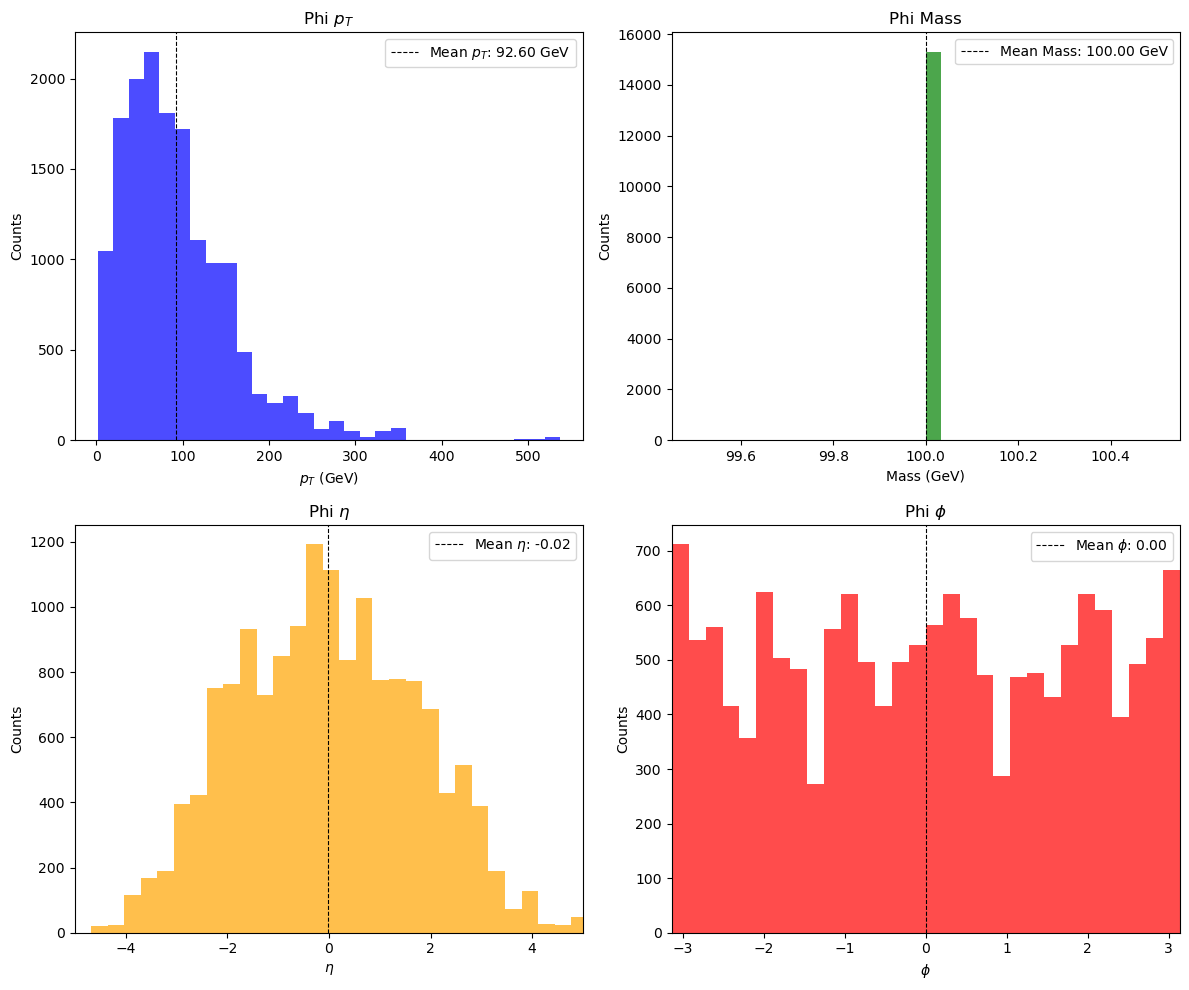

In [ ]:
fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(2, 2, figsize=(12, 10))

ax0.hist(phi_df["PT"], bins=30, color='blue', alpha=0.7)
ax0.set_title("Phi $p_{T}$")
ax0.set_xlabel("$p_{T}$ (GeV)")
ax0.set_ylabel("Counts")
ax0.axvline(phi_df["PT"].mean(), color='black', linestyle='--', linewidth=0.8, label=f'Mean $p_{{T}}$: {phi_df["PT"].mean():.2f} GeV')
ax0.legend()

ax1.hist(phi_df["Mass"], bins=30, color='green', alpha=0.7)
ax1.set_title("Phi Mass")
ax1.set_xlabel("Mass (GeV)")
ax1.set_ylabel("Counts")
ax1.axvline(phi_df["Mass"].mean(), color='black', linestyle='--', linewidth=0.8, label=f'Mean Mass: {phi_df["Mass"].mean():.2f} GeV')
ax1.legend()

ax2.hist(phi_df["Eta"], bins=30, color='orange', alpha=0.7)
ax2.set_title("Phi $\eta$")   
ax2.set_xlabel("$\eta$")
ax2.set_ylabel("Counts")
ax2.set_xlim(-5, 5)
ax2.axvline(phi_df["Eta"].mean(), color='black', linestyle='--', linewidth=0.8, label=f'Mean $\eta$: {phi_df["Eta"].mean():.2f}')
ax2.legend()

ax3.hist(phi_df["Phi"], bins=30, color='red', alpha=0.7)
ax3.set_title("Phi $\phi$")
ax3.set_xlabel("$\phi$")
ax3.set_ylabel("Counts")
ax3.set_xlim(-np.pi, np.pi)
ax3.axvline(phi_df["Phi"].mean(), color='black', linestyle='--', linewidth=0.8, label=f'Mean $\phi$: {phi_df["Phi"].mean():.2f}')
ax3.legend()

plt.tight_layout()

plt.savefig("truth_phi_info.png")
plt.show()